## Face Recognition with PyTorch

In this part of the workshop, we will code up feedforward neural networks for face recognition.


First, let's import the modules we need 

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from torch.autograd import Variable
import torch

# Needed for Jupyter to display images inline. Ignore
# if you're not using Jupyter/IPython notebook
%matplotlib inline  

### Getting the data

We'll get the data from the `cropped` directory using the `make_dataset` module.

In [2]:
from make_face_dataset import make_dataset

In [3]:
act = ['Fran Drescher', 'America Ferrera', 'Kristin Chenoweth', 'Alec Baldwin', 'Bill Hader', 'Steve Carell']
train_x, train_y = make_dataset(range(100), act)
test_x, test_y = make_dataset(range(100,120),act)

Here is what the data looks like:

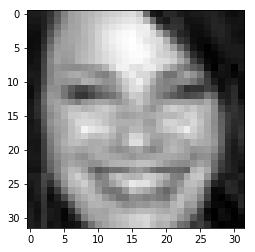

In [4]:
im_idx = 0
plt.imshow(train_x[im_idx, :].reshape((32, 32)), cmap = plt.cm.gray)

In [5]:
print("label:", train_y[im_idx], "Actor:", act[np.argmax(train_y[im_idx])])

label: [ 1.  0.  0.  0.  0.  0.] Actor: Fran Drescher


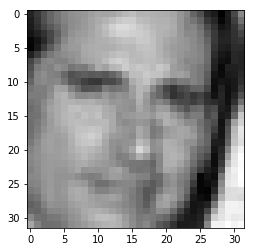

In [6]:
im_idx = 550
plt.imshow(train_x[-1, :].reshape((32, 32)), cmap = plt.cm.gray)

In [7]:
print("label:", train_y[im_idx], "Actor:", act[np.argmax(train_y[im_idx])])

label: [ 0.  0.  0.  0.  0.  1.] Actor: Steve Carell


### Defining the model

Some preliminaries:

In [8]:
dim_x = 1024
dim_h = 800
dim_out = 6



dtype_float = torch.FloatTensor
dtype_long = torch.LongTensor

We are now ready to start actually defining the model (together with the training data!)

In [9]:
x = Variable(torch.from_numpy(train_x), requires_grad=False).type(dtype_float)
y = Variable(torch.from_numpy(train_y.astype(float)), requires_grad=False).type(dtype_float)
y_classes = Variable(torch.from_numpy(np.argmax(train_y, 1)), requires_grad=False).type(dtype_long)

`x`, `y`, and `y_classes` are PyTorch Variables. Note that they actually have values already, unlike what you will see in TensorFlow. We will now define the neural network model. We'll use `toch.nn.Sequential`, which allows for Keras-style definitions of neural networks

In [10]:
model = torch.nn.Sequential(
    torch.nn.Linear(dim_x, dim_h),
    torch.nn.ReLU(),
    torch.nn.Linear(dim_h, dim_out),
)

`model` can be used to apply the network to `Variable` inputs.

We'll define a loss function using `torch.nn.CrossEntropyLoss()`, which computes the cross entropy from the logits of the class probability and the class labels (i.e., the average negative log-probability of the correct answer).

In [11]:
loss_fn = torch.nn.CrossEntropyLoss()

### Training the model

Now, let's optimize using Adam

In [12]:
learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
for t in range(1000):
    y_pred = model(x)
    loss = loss_fn(y_pred, y_classes)
    
    model.zero_grad()  # Zero out the previous gradient computation
    loss.backward()    # Compute the gradient
    optimizer.step()   # Use the gradient information to 
                       # make a step
    
    

Note that here we used full-batch gradient descent.


### Using and exploring the model

We are now ready to run the model on the test set. We'll define a new variable for that.

In [14]:
x_test_all_var = Variable(torch.from_numpy(test_x)).type(dtype_float)

In [15]:
y_test_all = model(x_test_all_var).data.numpy()

`y_test_all` is a NumPy array that contains all the logits of the probabilities for all six classes for all the test inputs. The classes are:

In [16]:
np.argmax(y_test_all, 1)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 3, 3, 5, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 4, 5, 4, 2, 4, 4, 4, 4, 5, 0, 5, 4,
       1, 4, 4, 4, 4, 5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 2, 5, 5, 5])

Looks pretty good. The performance is 

In [17]:
np.mean(np.argmax(y_test_all, 1) == np.argmax(test_y, 1))

0.84166666666666667

Let's visualize some of the weights.

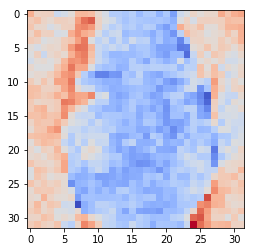

In [18]:
W = model[0].weight.data.numpy()
plt.imshow(W[2, :].reshape((32, 32)), cmap = plt.cm.coolwarm)

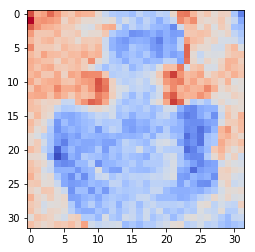

In [19]:
plt.imshow(W[11, :].reshape((32, 32)), cmap = plt.cm.coolwarm)

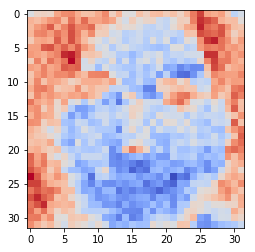

In [20]:
plt.imshow(W[15, :].reshape((32, 32)), cmap = plt.cm.coolwarm)